# 2.2 Dimensionality Reduction - PCA (Principal Component Analysis)

General steps for applying PCA to any dataset:

1. Import the required libraries:
    - numpy, pandas for data handling
    - matplotlib for visualization
    - StandardScaler for feature scaling
    - PCA for dimensionality reduction

2. Load the dataset into a DataFrame.

3. Separate the features (X) from the target variable (y), if applicable.

4. Standardize the features using StandardScaler to ensure all features are on the same scale.

5. Apply PCA without specifying the number of components to analyze the explained variance for each component.

6. Plot the cumulative explained variance to help decide how many principal components to keep.

7. Choose the number of components that explain a good amount of the total variance (commonly 90-95%).

8. Apply PCA again with the selected number of components.

9. Print the explained variance ratio for the selected components to understand how much information is retained.

10. Visualize the first two (or more) principal components with a scatter plot, optionally coloring the points based on target classes or groups.



In [ ]:
# ==============================
# Step 1. Import the required libraries:
# ==============================
#     - numpy, pandas for data handling
#     - matplotlib for visualization
#     - PCA for dimensionality reductionimport numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [39]:
# ==============================
# Step 2. Load the dataset into a DataFrame.
# ==============================
df = pd.read_csv("../datasets/pre_final_data.csv")
df

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol Level,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate Achieved,Exercise Induced Angina,ST Depression,Slope,Number of Major Arteries,Thalassemia,Heart Disease Status
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,1
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1


In [40]:
# ==============================
# Step 3. Separate the features (X) from the target variable (y), if applicable.
# ==============================
x = df.drop('Heart Disease Status', axis=1)
y = df['Heart Disease Status']

print(x.shape)  
print(y.shape) 

(303, 13)
(303,)


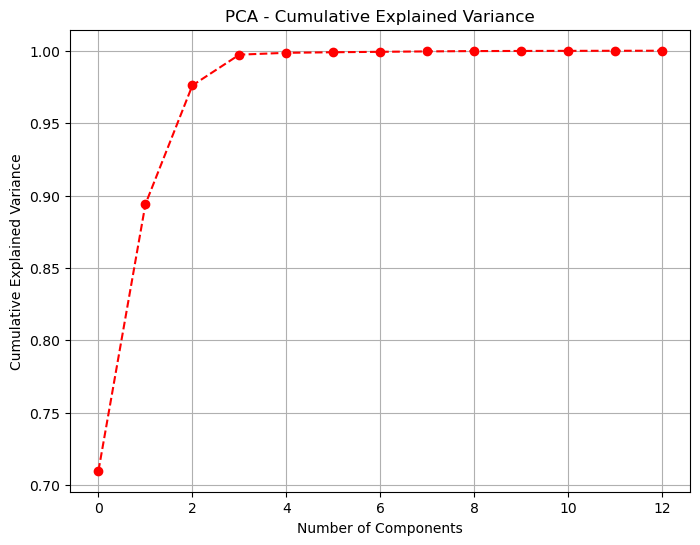

In [41]:
# ==============================
# Step 5. Apply PCA without specifying the number of components to analyze the explained variance for each component.
# ==============================
pca = PCA()
pca.fit(x)

# ==============================
# 6. Plot the cumulative explained variance to help decide how many principal components to keep.
# ==============================
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

Explained variance ratio of selected components: [7.09943232e-01 1.84062690e-01 8.20437949e-02 2.12293902e-02
 1.28366842e-03 3.83238019e-04]
Total explained variance: 99.89%


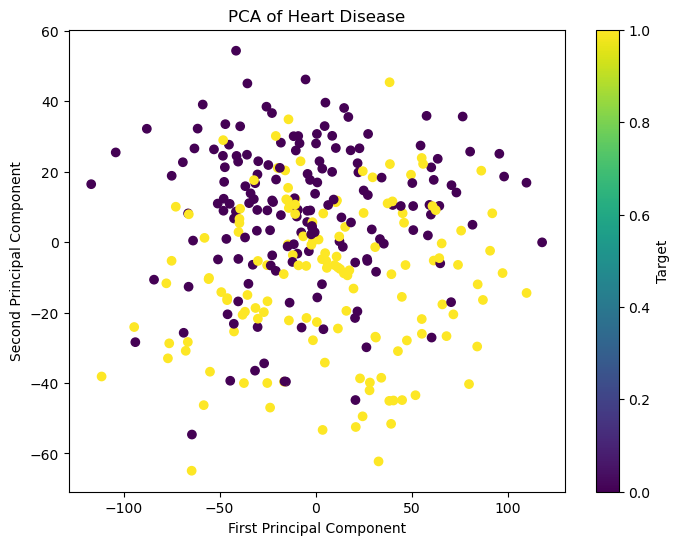

In [44]:
# ==============================
# 7. Choose the number of components that explain a good amount of the total variance (commonly 90-95%).
# ==============================
num_components = 6

# ==============================
# 8. Apply PCA again with the selected number of components.
# ==============================
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(x)

# ==============================
# 9. Print the explained variance ratio for the selected components to understand how much information is retained.
# ==============================
print(f"Explained variance ratio of selected components: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# ==============================
# 10. Visualize the first two (or more) principal components with a scatter plot, optionally 
# ==============================
# coloring the points based on target classes or groups.
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Heart Disease')
plt.colorbar(label='Target')
plt.show()

# Notes
- If you change the number in pca = PCA(n_components=6),
   the explained variance percentage will change accordingly.
- The closer the number of components is to the total features in x,
   the higher the explained variance, since more information is retained.
- Reducing the number of components decreases both features and model complexity.
- However, it is important to keep at least 95% of the explained variance
   to preserve most of the data’s important information while reducing dimensionality.


# ==================================================================================================

# Manual PCA - Computing Eigenvalues and Eigenvectors Explanation:



 Step 1: Convert the feature dataset (X) to a NumPy array with float values
 This is required because NumPy operations like covariance calculation 
 need numeric arrays.

 Step 2: Compute the Covariance Matrix of the dataset
 - The covariance matrix describes the relationship between different features.
 - It shows how much the variables vary together.
 - Transposing (x_numeric.T) ensures that covariance is computed between columns (features), not rows.

 Step 3: Calculate Eigenvalues and Eigenvectors of the Covariance Matrix
 - Eigenvalues represent the amount of variance explained by each principal component.
 - Eigenvectors represent the directions of these principal components in the feature space.
 - These directions (eigenvectors) form the new axes onto which the data is projected during PCA.

 Step 4: Interpretation
 - By sorting the eigenvalues in descending order, you identify which components capture the most variance.
 - The corresponding eigenvectors define how the original features contribute to each principal component.
 - This is the mathematical foundation of PCA.

 Note:
 - This manual process is done internally by sklearn's PCA class.
 - Computing eigenvalues and eigenvectors manually is useful for understanding how PCA works behind the scenes,
   but for practical applications, it's recommended to use sklearn's PCA for efficiency and simplicity.


In [45]:
# Compute and display eigenvalues and eigenvectors
x_numeric = x.astype(float).to_numpy()

cov_matrix = np.cov(x_numeric.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.00309490e+03 5.19330303e+02 2.31485419e+02 5.98984273e+01
 3.62185249e+00 1.08130071e+00 6.41195230e-01 7.99767901e-01
 8.53433455e-01 2.36212417e-01 1.78189064e-01 1.19101109e-01
 1.45910968e-01]

Eigenvectors:
[[-3.73942984e-02 -1.78413349e-01 -1.62345047e-01  9.69183573e-01
   3.62032899e-03 -1.74026769e-02 -2.56867534e-02  6.32139087e-03
  -1.55039085e-04  3.17066428e-03  7.72470517e-03 -3.43648683e-03
   5.85757165e-04]
 [ 1.31071683e-03 -8.22749235e-04  6.93425915e-04 -6.25961278e-03
  -9.83351800e-02 -6.88756890e-03  6.44420852e-02  4.22378503e-02
  -3.94977489e-02  2.63266212e-01  8.26725373e-01 -5.82230314e-02
   4.75993637e-01]
 [-1.32406307e-03 -1.34852618e-02  6.83835320e-03 -3.18601880e-03
  -1.24470294e-01  2.62484061e-01 -4.70051813e-01 -8.11359423e-01
   1.09278043e-01 -1.37670352e-02 -6.83182404e-03  4.57717119e-02
   1.47793703e-01]
 [-3.98502838e-02 -9.93860373e-02 -9.77002998e-01 -1.83661838e-01
   1.14291307e-02 -6.82432938e-03 -1.77096345e-03 -8.38

This is the internal mathematical essence that the PCA library from sklearn does automatically
when you use it:

- pca = PCA()
- pca.fit(x_scaled)